# 필수과제 - 영화데이터의 평점을 예측하는 KNN 회귀 모델링 진행하기


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/데이터 분석 중급반(6기)/데이터

Mounted at /content/drive
/content/drive/MyDrive/데이터 분석 중급반(6기)/데이터


# 1. 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
movie = pd.read_csv("./basic_movie.tsv", delimiter= "\t")
movie.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1972
1,tt0000002,5.8,263
2,tt0000003,6.5,1819
3,tt0000004,5.6,178
4,tt0000005,6.2,2614


In [ ]:
desc = pd.read_csv("./data-2.tsv", delimiter= "\t")
desc.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [ ]:
data = pd.merge(movie, desc)
data.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1972,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,5.8,263,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1819,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,5.6,178,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2614,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


###  결측치 확인 및 제거

In [ ]:
data.isna().sum()

tconst            0
averageRating     0
numVotes          0
titleType         0
primaryTitle      0
originalTitle     1
isAdult           1
startYear         1
endYear           1
runtimeMinutes    1
genres            1
dtype: int64

In [ ]:
data.dropna(inplace = True)
data.isna().sum()

tconst            0
averageRating     0
numVotes          0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

# 2. KNN 모델 생성

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np

from sklearn import neighbors

In [ ]:
X = np.array(movie['numVotes']).reshape(-1,1)
y = np.array(movie['averageRating']).reshape(-1,1)

In [ ]:
scalerX = StandardScaler()
scalerX.fit(X)
scaled_X = scalerX.transform(X)
scaled_X

array([[ 0.05359624],
       [-0.04446402],
       [ 0.04481729],
       ...,
       [-0.05748899],
       [-0.05915298],
       [-0.05915298]])

In [ ]:
scalery = StandardScaler()
scalery.fit(y)
scaled_y = scalery.transform(y)
scaled_y

array([[-0.90318525],
       [-0.83093504],
       [-0.32518357],
       ...,
       [ 0.1805679 ],
       [ 0.39731854],
       [ 0.03606748]])

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1049254, 1)
(262314, 1)
(1049254, 1)
(262314, 1)


In [ ]:
rmse_val =[]
for K in range(1,20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)

RMSE value k 2 = 1.205581210909724
RMSE value k 3 = 1.1165597943293675
RMSE value k 4 = 1.090441065718847
RMSE value k 5 = 1.0668200579792106
RMSE value k 6 = 1.0621625101862933
RMSE value k 7 = 1.0582431428510826
RMSE value k 8 = 1.053494004290422
RMSE value k 9 = 1.0481969231073727
RMSE value k 10 = 1.0339808422169101
RMSE value k 11 = 1.0293501565297194
RMSE value k 12 = 1.0263220472771042
RMSE value k 13 = 1.0238904334256111
RMSE value k 14 = 1.019706714357953
RMSE value k 15 = 1.0181928504013773
RMSE value k 16 = 1.016296348773378
RMSE value k 17 = 1.0153932003785868
RMSE value k 18 = 1.0123163025866813
RMSE value k 19 = 1.0127043528143538
RMSE value k 20 = 1.0121495053832101


movie데이터를 이용한 KNN모델의 결과 rmse값이 계속 감소하는 경향을 보인다.

이는 과대적합이 된 것으로 보인다.

<Axes: >

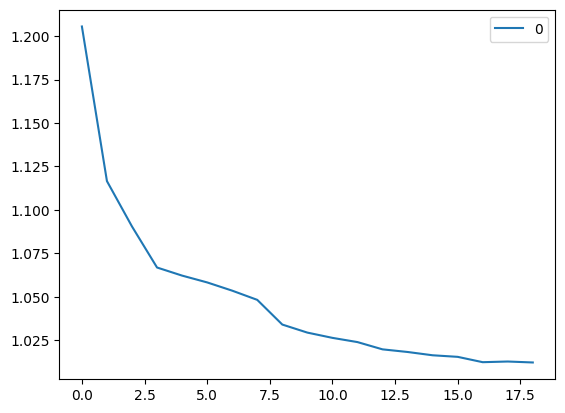

In [ ]:
curve = pd.DataFrame(rmse_val)
curve.plot()

# 3. 영화 정보 데이터를 포함한 모델 학습

- 전체 영화 데이터를 이용해서 모델을 학습해보고자 한다.
- 가설 : 성인영화의 여부(isAdult)와 영화상영시간(runtimeMinutes)에 따라서도 평점에 영향을 줄 것이다.
- 두 열을 추가하여 모델을 학습해보고자 한다.

In [ ]:
data.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1972,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,5.8,263,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1819,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,5.6,178,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2614,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [ ]:
data2 = data[["averageRating",	"numVotes", "isAdult", "runtimeMinutes"]]
data2

,averageRating,numVotes,isAdult,runtimeMinutes
0,5.7,1972,0.0,1
1,5.8,263,0.0,5
2,6.5,1819,0.0,4
3,5.6,178,0.0,12
4,6.2,2614,0.0,1
...,...,...,...,...
403738,7.7,326,0.0,24
403739,7.7,373,0.0,24
403740,8.1,322,0.0,24
403741,7.7,318,0.0,24


In [ ]:
X = np.array(data2[['numVotes', 'isAdult', 'runtimeMinutes']])
y = np.array(data2['averageRating'])

runtimeMinutes에서 72993개의 결측치 발견("\\N")
- 결측치의 비중이 18%로 적은 편은 아니지만 일단은 제거하기로 판단

In [ ]:
print("각 열의 결측치 개수 :",sum(X == '\\N'))
print('데이터 개수 :', data2.shape[0])
print("결측치 비중 :",round((sum(X == '\\N')[2] / data2.shape[0]),2) *100 , "%")
print("제거 후 예상 데이터 개수 :", 403743 - 72993)

각 열의 결측치 개수 : [    0     0 72993]
데이터 개수 : 403743
결측치 비중 : 18.0 %
제거 후 예상 데이터 개수 : 330750


- 제거가 잘 이루어졌음을 확인 가능

In [ ]:
delete = data2[data2['runtimeMinutes'] == "\\N"].index
data2.drop(delete, inplace = True)
data2.shape[0]

<ipython-input-66-d2c2f556b382>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(delete, inplace = True)


330750

X,y 재설정

In [ ]:
X = np.array(data2[['numVotes', 'isAdult', 'runtimeMinutes']])
y = np.array(data2['averageRating']).reshape(-1,1)

In [ ]:
scalerX = StandardScaler()
scalerX.fit(X)
scaled_X = scalerX.transform(X)
scaled_X

array([[-0.00147491, -0.17992848, -1.29801439],
       [-0.06528519, -0.17992848, -1.21768035],
       [-0.00718759, -0.17992848, -1.23776386],
       ...,
       [-0.06308226, -0.17992848, -0.83609367],
       [-0.06323162, -0.17992848, -0.83609367],
       [-0.06069265, -0.17992848, -0.83609367]])

In [ ]:
scalery = StandardScaler()
scalery.fit(y)
scaled_y = scalery.transform(y)
scaled_y

array([[-0.74348399],
       [-0.66486472],
       [-0.1145298 ],
       ...,
       [ 1.14337858],
       [ 0.82890149],
       [ 0.43580512]])

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(264600, 3)
(66150, 3)
(264600, 1)
(66150, 1)


In [ ]:
rmse_val =[]
for K in range(1,20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)

RMSE value k 2 = 1.0673108766585913
RMSE value k 3 = 1.0072141573313766
RMSE value k 4 = 0.9748884923443843
RMSE value k 5 = 0.9538973016273194
RMSE value k 6 = 0.9417114906117701
RMSE value k 7 = 0.9326984679579857
RMSE value k 8 = 0.9259925700883922
RMSE value k 9 = 0.9200613439373202
RMSE value k 10 = 0.9154424336426873
RMSE value k 11 = 0.9108908462577509
RMSE value k 12 = 0.9077739425527122
RMSE value k 13 = 0.9048332147281235
RMSE value k 14 = 0.9020797492690906
RMSE value k 15 = 0.9005011607226935
RMSE value k 16 = 0.8988327536507867
RMSE value k 17 = 0.8970474656842231
RMSE value k 18 = 0.895910937821102
RMSE value k 19 = 0.8946916568140836
RMSE value k 20 = 0.8934633982672278


- 마찬가지로 큰 차이 없이 계속 rmse가 감소하는 모습을 보인다

<Axes: >

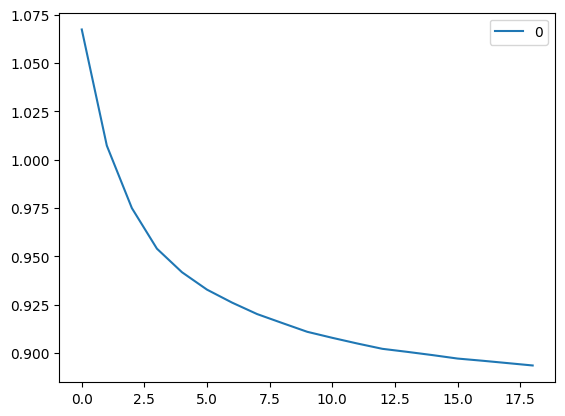

In [ ]:
curve = pd.DataFrame(rmse_val)
curve.plot()